In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import copy
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [24]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


From the dataset we can observer that our target column (Attrition) is classified into Yes and No

In [25]:
for columns in data.columns:
    print(data[columns].unique())

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 14

In [26]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [27]:
print(
data["Attrition"],
data["BusinessTravel"],
data["Department"],
data["EducationField"],
data["Gender"],
data["JobRole"],
data["MaritalStatus"],
data["Over18"],
data["OverTime"]
)

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object 0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: object 0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object 0       Life Sciences
1       Life Sciences
2               Other
3       Life Sciences
4           

In [28]:
le = LabelEncoder()
data["Attrition"] = le.fit_transform(data["Attrition"])
data["BusinessTravel"] = le.fit_transform(data["BusinessTravel"])
data["Department"] = le.fit_transform(data["Department"])
data["EducationField"] = le.fit_transform(data["EducationField"])
data["Gender"] = le.fit_transform(data["Gender"])
data["JobRole"] = le.fit_transform(data["JobRole"])
data["MaritalStatus"] = le.fit_transform(data["MaritalStatus"])
data["Over18"] = le.fit_transform(data["Over18"])
data["OverTime"] = le.fit_transform(data["OverTime"])
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [29]:
corr_matrix = data.corr()
corr_matrix

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


In [33]:
corr_matrix["Attrition"]

Age                        -0.159205
Attrition                   1.000000
BusinessTravel              0.000074
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
Over18                           NaN
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
S

<AxesSubplot:>

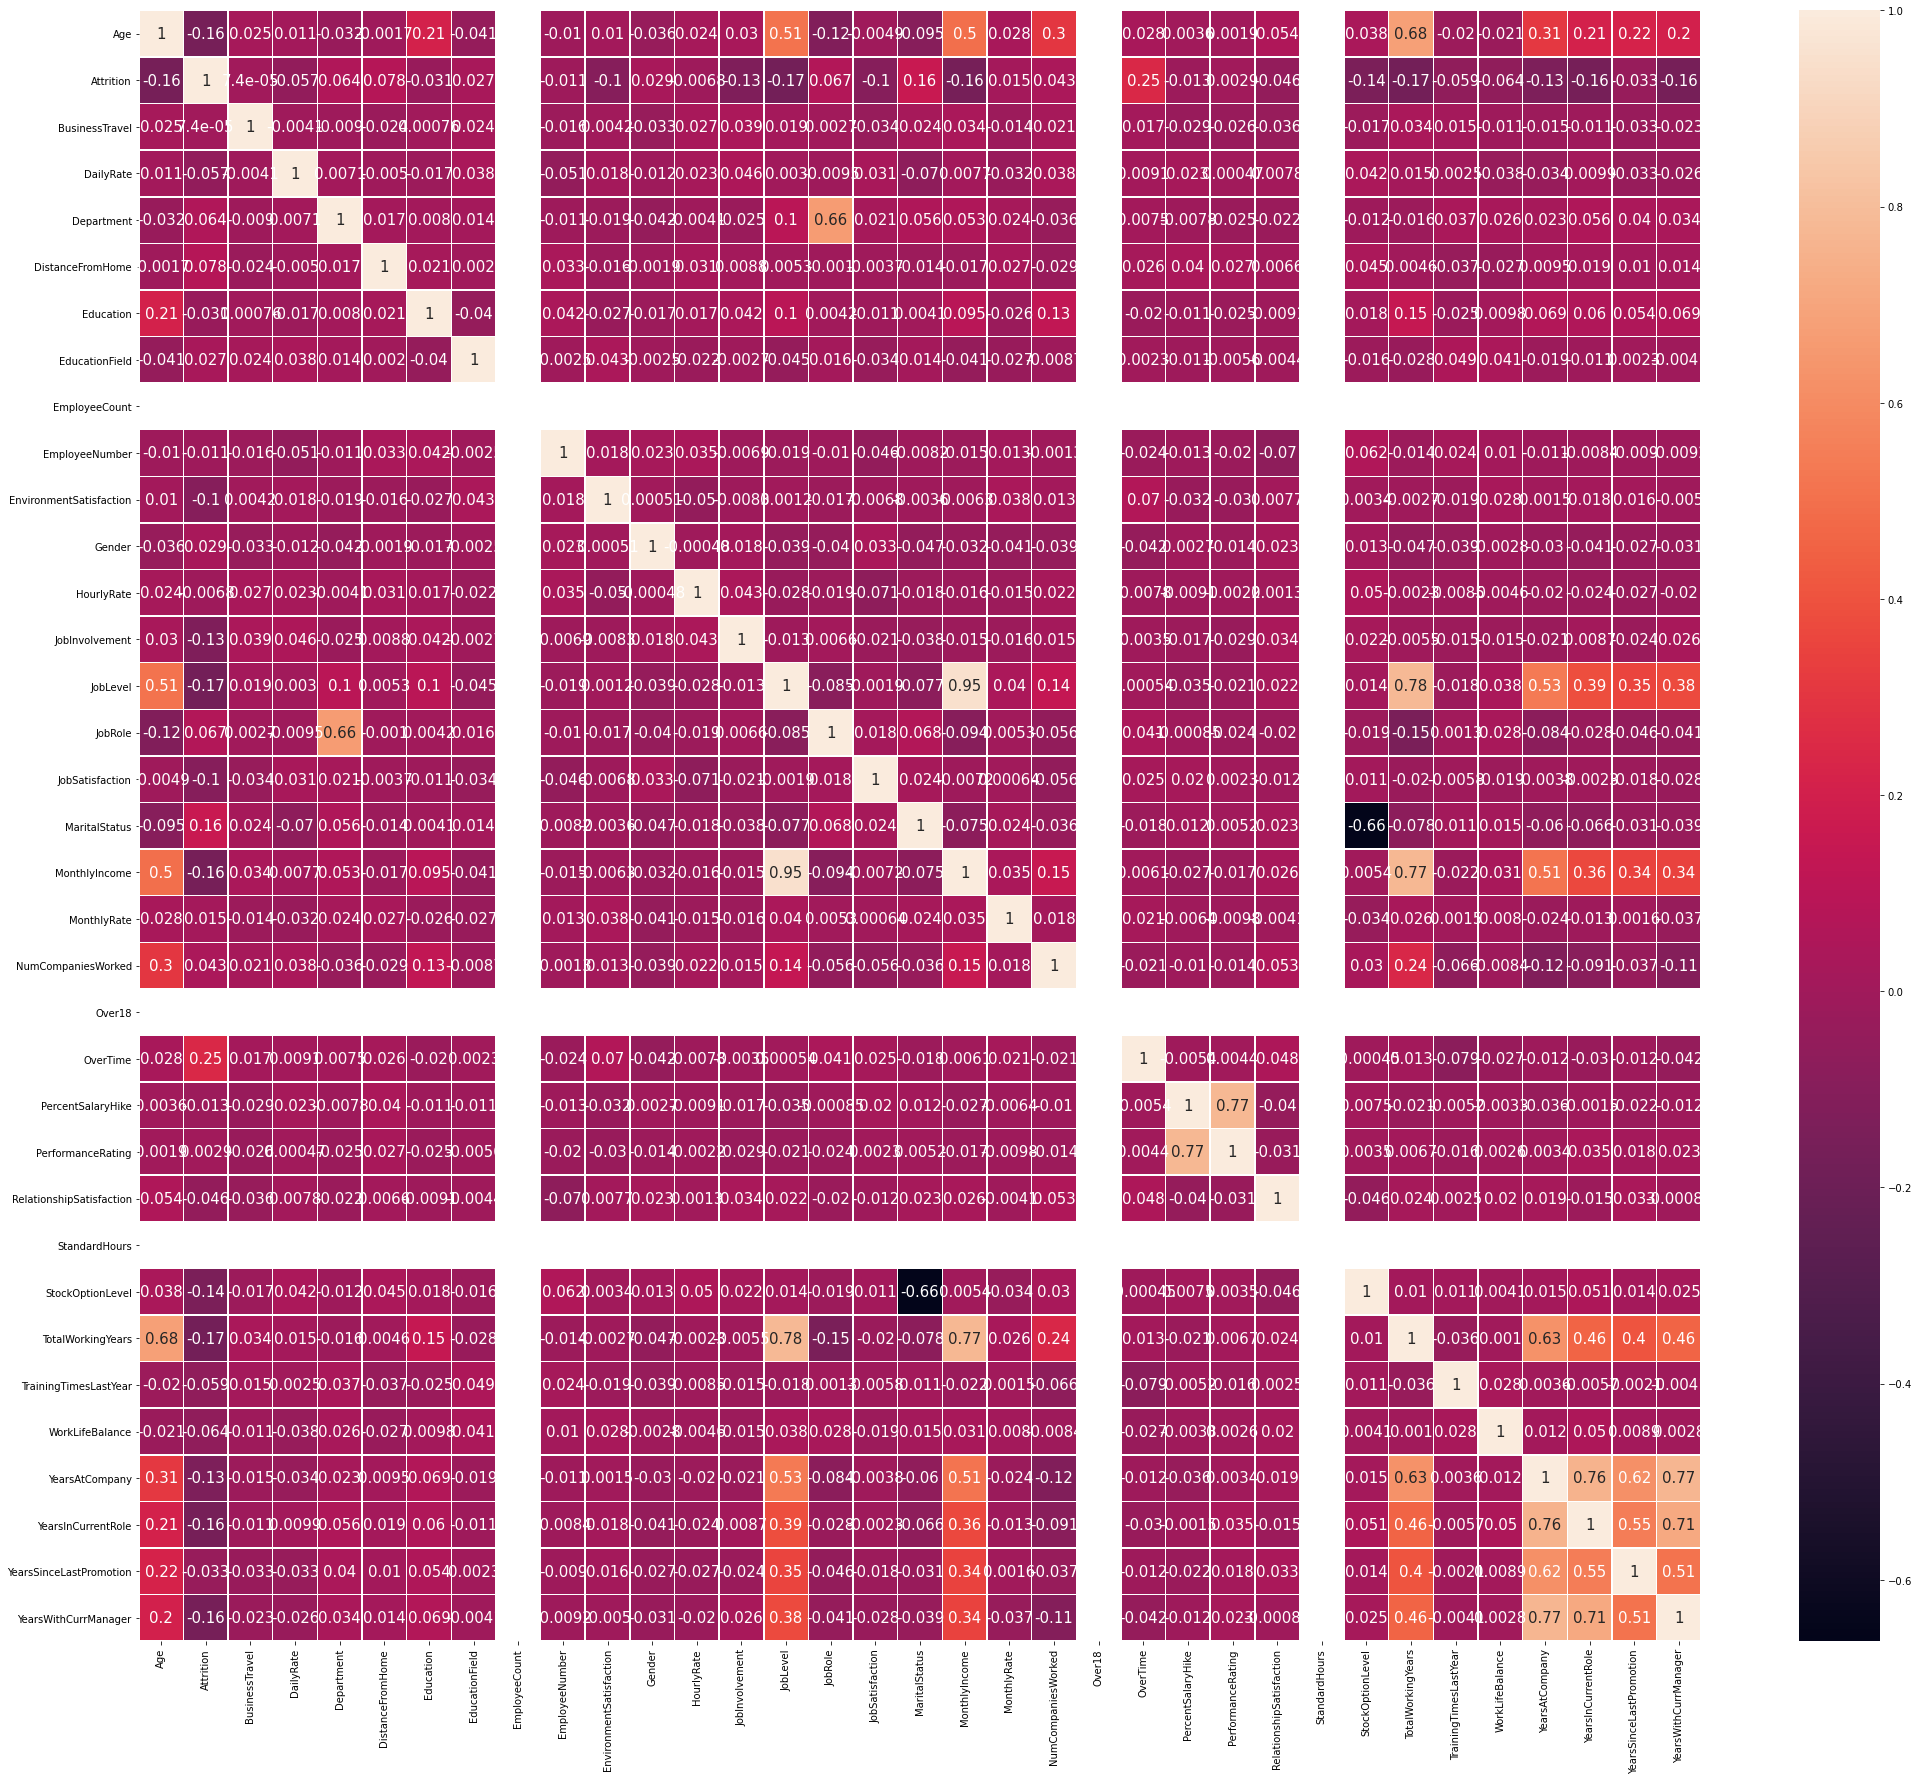

In [32]:
plt.figure(figsize=(35,30))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,annot_kws={'size': 15})

From the heat map we observe that PercentageSalaryHike and Performance Rating, YearsAtCompany and YearsInCurrentRole, Joblevel and MonthlyIncome along with YearsSinceLastPromotion and YearsWithCurrManager have high multicolinearity

In [34]:
df = data.drop(["EmployeeCount","Over18","StandardHours"],axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


Dropping the columns with no correlation

In [36]:
df.drop("EmployeeNumber",axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


We drop column EmployeeNumber since all rows have unique values and employee number is different for every individual

In [38]:
len(data["EmployeeNumber"].unique())

1470

## Using Standard Scaler to reduce range of values

In [39]:
scaler = StandardScaler()

In [78]:
X = df.drop("Attrition",axis=1)
X = scaler.fit_transform(X)
X

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [79]:
Y = df["Attrition"]
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Using PCA to reduce the dimension

In [80]:
pca = PCA()

In [81]:
pca.fit_transform(X)

array([[-0.392964  ,  0.23630359, -1.77573851, ..., -0.46517513,
        -0.61203651,  0.00782657],
       [ 0.57893251, -1.3028011 ,  2.95364349, ..., -0.56074537,
        -0.41451703,  0.16347128],
       [-2.46430109,  1.22983485, -0.32867348, ...,  0.12049508,
        -0.0120931 ,  0.02941168],
       ...,
       [-1.24281443, -0.10223927,  2.55350468, ...,  0.03265146,
        -0.28839971,  0.0935071 ],
       [ 0.89671248, -0.71526355, -1.13343289, ..., -0.15159928,
         0.32694085,  0.03917939],
       [-1.17613295,  0.53018536, -0.60845358, ..., -0.19690939,
        -0.19337676,  0.29091853]])

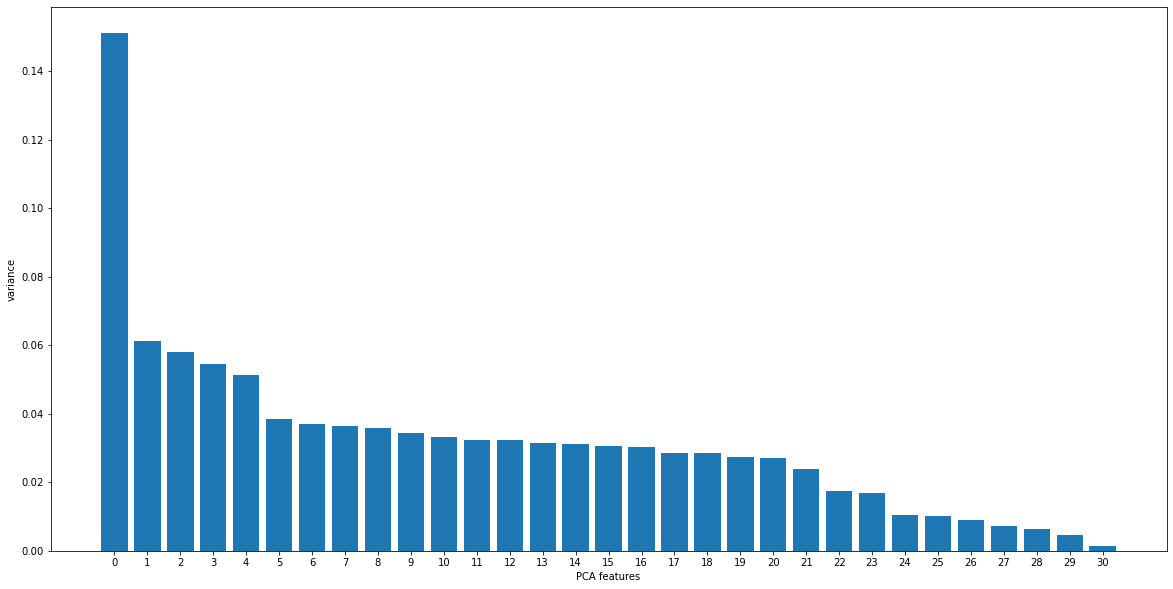

In [73]:
features = range(pca.n_components_)
plt.figure(figsize=(20,10))
plt.bar(features,pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

In [74]:
pca.explained_variance_ratio_

array([0.15117765, 0.06114354, 0.05816788, 0.05464114, 0.05146782,
       0.03853271, 0.03703788, 0.03657881, 0.0359128 , 0.03438039,
       0.03333633, 0.03248468, 0.03232453, 0.0316036 , 0.03111195,
       0.03055598, 0.030281  , 0.02869389, 0.02842834, 0.02746784,
       0.0271386 , 0.02388697, 0.0173601 , 0.0167328 , 0.01051341,
       0.01027388, 0.00899243, 0.00724672, 0.00648513, 0.00454758,
       0.00149363])

In [75]:
ratio_sum = 0
count = 0
for i in pca.explained_variance_ratio_:
    ratio_sum += i
    count+=1
    if ratio_sum>0.7:
        break
print(count)

15


In [88]:
pca = PCA(n_components=15)

In [89]:
X = pca.fit_transform(X)
X

array([[-0.39296562,  0.23635043, -1.77565775, ..., -0.54796398,
         0.61166112, -1.94292818],
       [ 0.57893223, -1.30263613,  2.95353955, ..., -0.042556  ,
        -0.3949173 , -0.83305813],
       [-2.46429546,  1.22996187, -0.32885583, ...,  0.87593951,
         1.78279068, -0.46940509],
       ...,
       [-1.24281498, -0.1022116 ,  2.55372331, ...,  0.63497556,
        -0.47388052,  0.0920364 ],
       [ 0.89670554, -0.71554539, -1.13325054, ...,  0.63690904,
         0.74601968, -1.58448222],
       [-1.17614879,  0.52965583, -0.60804081, ...,  1.24460847,
        -1.40695216,  0.61027263]])

In [91]:
features = []
for i in range(1,len(X[0])+1):
    features.append("f"+str(i))
features

['f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15']

In [162]:
df_pca = pd.DataFrame(X,columns=features)
df_pca

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15
0,-0.392966,0.236350,-1.775658,1.984422,0.974560,1.314629,-2.666160,-0.077604,0.217582,-3.208765,-0.327914,-0.542170,-0.547964,0.611661,-1.942928
1,0.578932,-1.302636,2.953540,0.760069,-0.002675,1.188569,0.727609,0.715534,-0.327336,1.062907,2.259289,-1.370648,-0.042556,-0.394917,-0.833058
2,-2.464295,1.229962,-0.328856,1.069798,-1.285649,1.399982,0.095083,-2.318839,0.246408,-0.080716,-1.135783,-0.436340,0.875940,1.782791,-0.469405
3,-0.859866,-0.496316,-1.219892,-0.056798,-0.404831,2.121839,-0.695105,-0.363361,0.733815,-0.081282,0.359824,0.832363,-2.321922,-0.932351,-0.833062
4,-1.835541,1.256591,-0.559590,-0.313232,-1.024604,0.612226,0.478556,-1.446268,-1.166915,0.763329,1.384837,-1.244307,-0.282594,0.181267,0.078390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.720195,0.993885,0.572516,-0.605777,-0.498901,0.136037,0.002410,0.562706,-0.310293,1.152835,-0.675121,1.755214,1.385646,-1.390038,0.968824
1466,0.910270,0.537569,0.152278,-0.891961,-1.317126,-0.611230,3.697279,0.370983,0.788499,-0.553540,-0.376932,-0.028713,1.375387,-0.371670,-0.866491
1467,-1.242815,-0.102212,2.553723,0.120318,0.128615,-1.241280,-1.665596,0.974189,1.082894,0.186372,-1.414501,-3.027318,0.634976,-0.473881,0.092036
1468,0.896706,-0.715545,-1.133251,0.406664,0.634841,-0.158660,0.334381,0.119342,-0.000192,1.230396,-0.731769,0.935787,0.636909,0.746020,-1.584482


In [163]:
df_pca["Attrition"] = Y
df_pca

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,Attrition
0,-0.392966,0.236350,-1.775658,1.984422,0.974560,1.314629,-2.666160,-0.077604,0.217582,-3.208765,-0.327914,-0.542170,-0.547964,0.611661,-1.942928,1
1,0.578932,-1.302636,2.953540,0.760069,-0.002675,1.188569,0.727609,0.715534,-0.327336,1.062907,2.259289,-1.370648,-0.042556,-0.394917,-0.833058,0
2,-2.464295,1.229962,-0.328856,1.069798,-1.285649,1.399982,0.095083,-2.318839,0.246408,-0.080716,-1.135783,-0.436340,0.875940,1.782791,-0.469405,1
3,-0.859866,-0.496316,-1.219892,-0.056798,-0.404831,2.121839,-0.695105,-0.363361,0.733815,-0.081282,0.359824,0.832363,-2.321922,-0.932351,-0.833062,0
4,-1.835541,1.256591,-0.559590,-0.313232,-1.024604,0.612226,0.478556,-1.446268,-1.166915,0.763329,1.384837,-1.244307,-0.282594,0.181267,0.078390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.720195,0.993885,0.572516,-0.605777,-0.498901,0.136037,0.002410,0.562706,-0.310293,1.152835,-0.675121,1.755214,1.385646,-1.390038,0.968824,0
1466,0.910270,0.537569,0.152278,-0.891961,-1.317126,-0.611230,3.697279,0.370983,0.788499,-0.553540,-0.376932,-0.028713,1.375387,-0.371670,-0.866491,0
1467,-1.242815,-0.102212,2.553723,0.120318,0.128615,-1.241280,-1.665596,0.974189,1.082894,0.186372,-1.414501,-3.027318,0.634976,-0.473881,0.092036,0
1468,0.896706,-0.715545,-1.133251,0.406664,0.634841,-0.158660,0.334381,0.119342,-0.000192,1.230396,-0.731769,0.935787,0.636909,0.746020,-1.584482,0


In [194]:
unique, counts = np.unique(Y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1233]
 [   1  237]]


We can see that there is class imbalance in this dataset

Therefore, we will use f1 score instead of accuracy score

## EDA

### Univariate Analysis

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


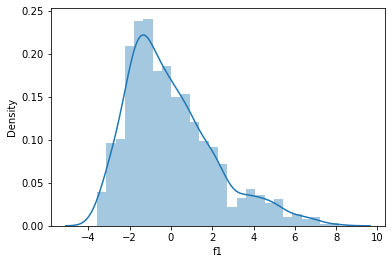

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


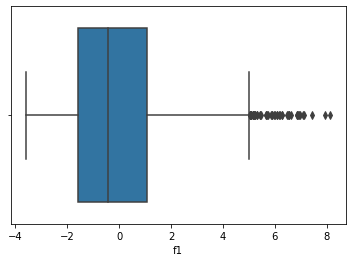

In [123]:
sns.distplot(df_pca["f1"])
plt.show()
sns.boxplot(df_pca["f1"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


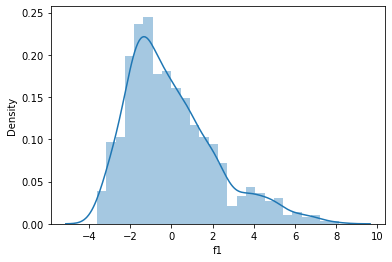

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


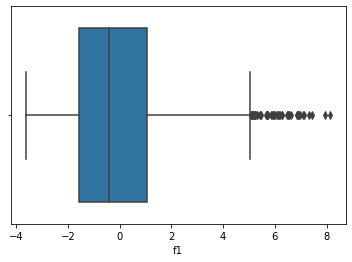

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


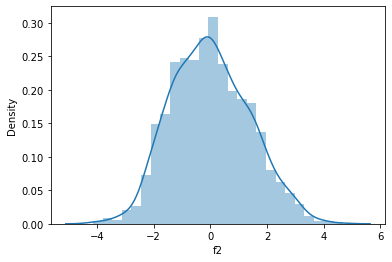

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


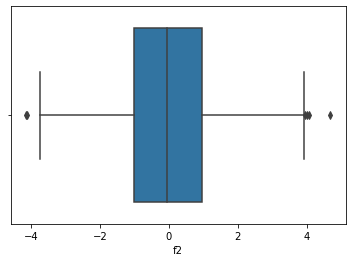

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


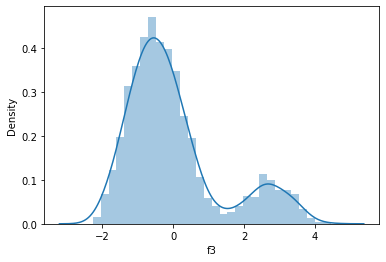

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


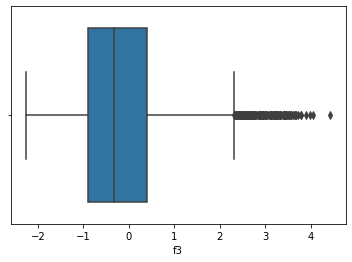

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


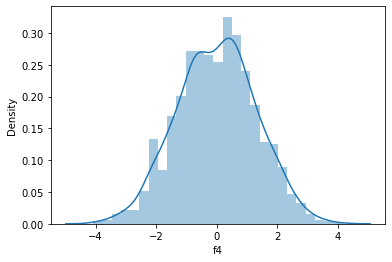

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


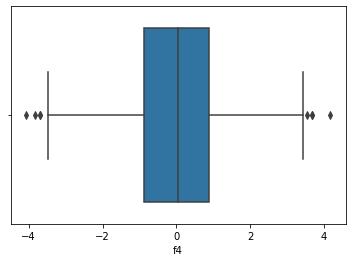

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


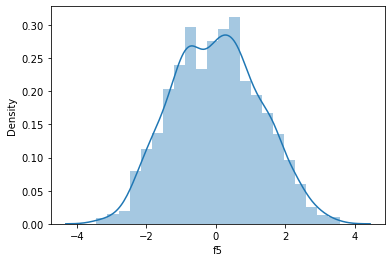

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


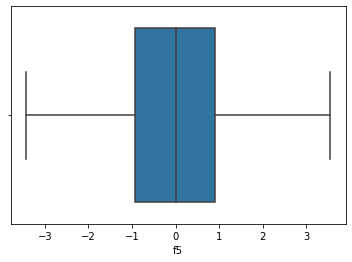

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


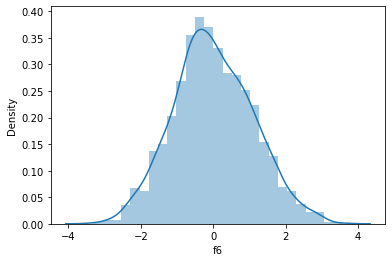

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


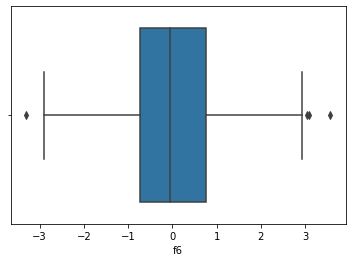

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


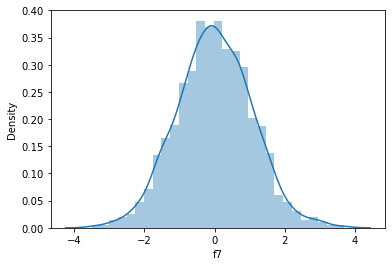

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


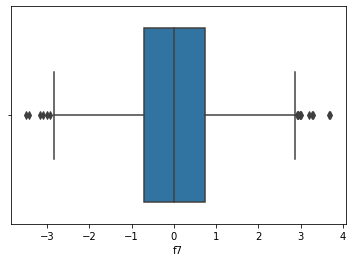

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


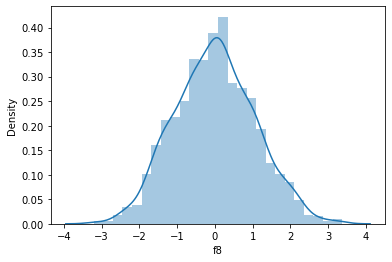

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


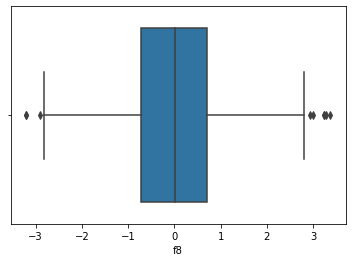

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


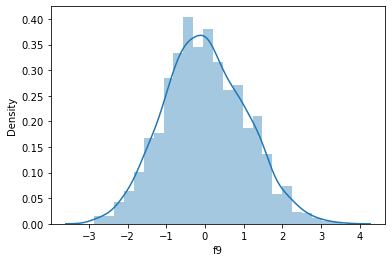

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


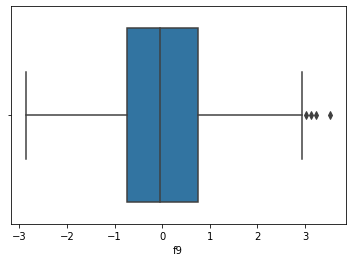

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


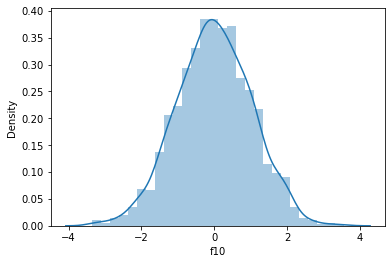

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


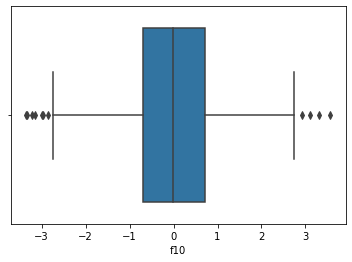

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


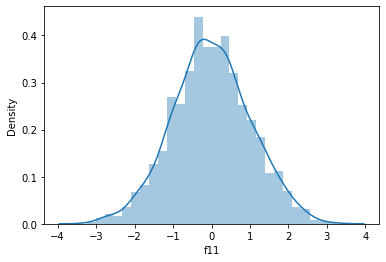

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


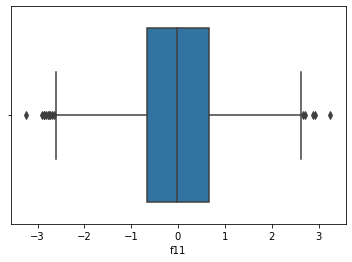

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


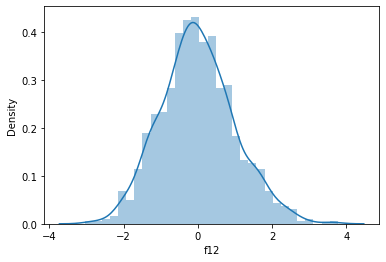

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


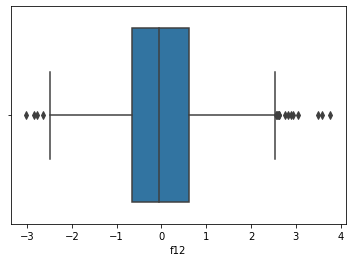

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


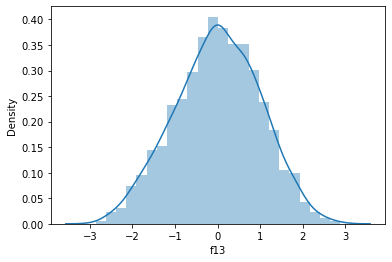

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


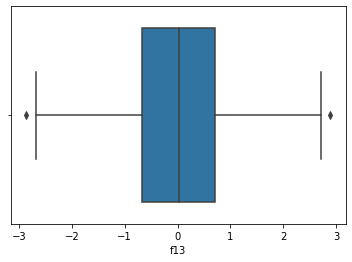

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


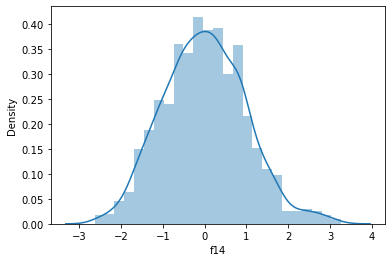

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


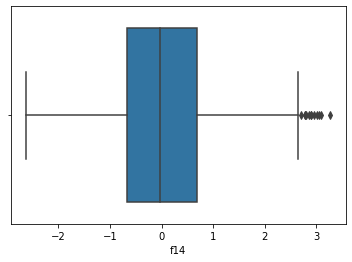

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


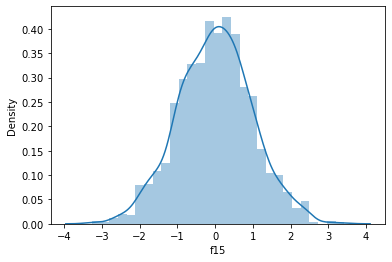

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


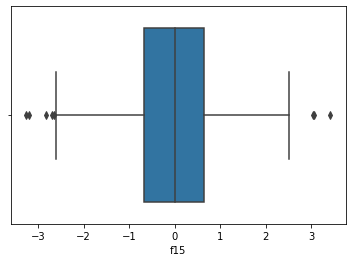

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


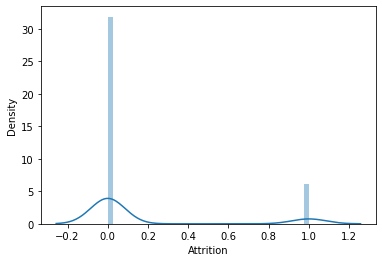

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


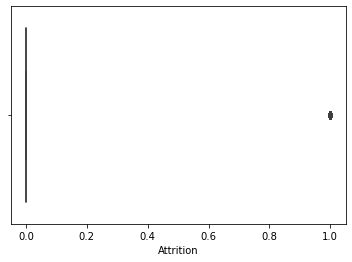

In [99]:
for i in df_pca.columns:
    sns.distplot(df_pca[i])
    plt.show()
    sns.boxplot(df_pca[i])
    plt.show()

## Using Zscore to remove outliers

In [166]:
for column in df_pca.columns:
    zscore = stats.zscore(df_pca[column])
    for i in range(len(zscore)):
        if abs(zscore[i])>3:
            df_pca = df_pca.drop(i)
    df_pca=df_pca.reset_index(drop=True)
df_pca

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,Attrition
0,0.578932,-1.302636,2.953540,0.760069,-0.002675,1.188569,0.727609,0.715534,-0.327336,1.062907,2.259289,-1.370648,-0.042556,-0.394917,-0.833058,0
1,-2.464295,1.229962,-0.328856,1.069798,-1.285649,1.399982,0.095083,-2.318839,0.246408,-0.080716,-1.135783,-0.436340,0.875940,1.782791,-0.469405,1
2,-0.859866,-0.496316,-1.219892,-0.056798,-0.404831,2.121839,-0.695105,-0.363361,0.733815,-0.081282,0.359824,0.832363,-2.321922,-0.932351,-0.833062,0
3,-1.835541,1.256591,-0.559590,-0.313232,-1.024604,0.612226,0.478556,-1.446268,-1.166915,0.763329,1.384837,-1.244307,-0.282594,0.181267,0.078390,0
4,-0.621815,-1.178910,-0.413624,-0.477306,-2.407051,1.465896,-1.481992,-0.275342,-1.228576,-0.159549,-0.105923,-0.060140,0.024155,-0.480876,-1.680076,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,0.065678,-1.206648,0.381167,0.219628,-1.444215,-2.085382,-0.013074,0.924756,-0.354977,1.669741,-0.714699,-0.213402,0.929597,1.057312,-1.008783,0
1406,-2.456401,-1.895037,-1.010546,1.551372,0.543444,0.783933,1.553861,-0.069666,0.980067,0.442602,-0.903296,1.112539,-0.293522,-0.160425,-0.225643,0
1407,-0.720195,0.993885,0.572516,-0.605777,-0.498901,0.136037,0.002410,0.562706,-0.310293,1.152835,-0.675121,1.755214,1.385646,-1.390038,0.968824,0
1408,0.896706,-0.715545,-1.133251,0.406664,0.634841,-0.158660,0.334381,0.119342,-0.000192,1.230396,-0.731769,0.935787,0.636909,0.746020,-1.584482,0


In [172]:
(len(df)-len(df_pca))/len(df)*100

4.081632653061225

We observe that the loss in data is less than 10%

## Bivariate Analysis

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


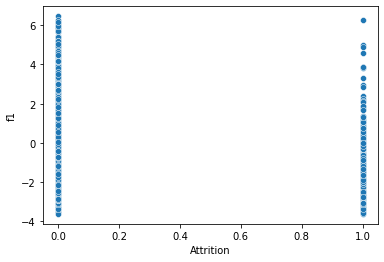

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


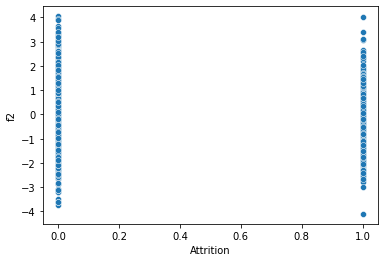

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


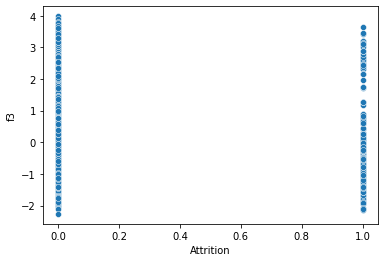

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


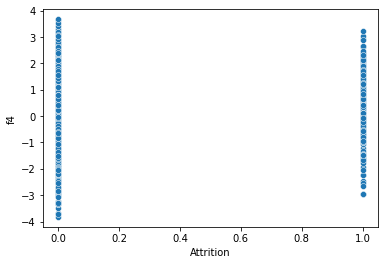

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


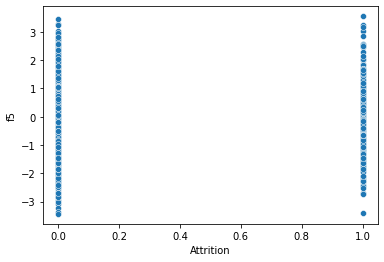

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


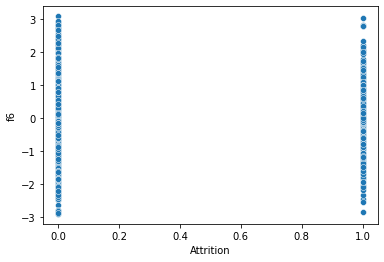

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


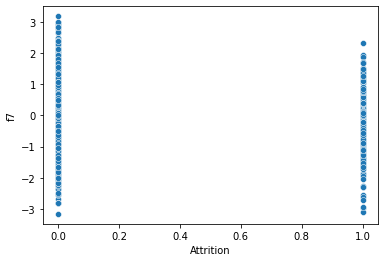

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


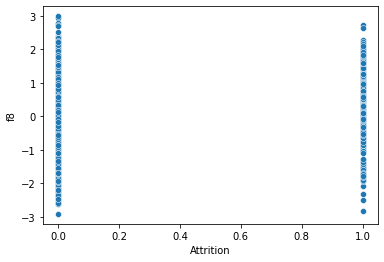

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


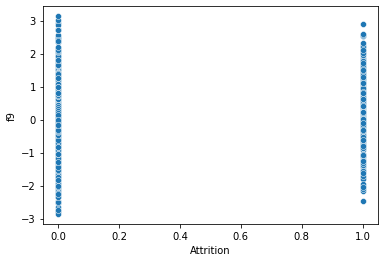

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


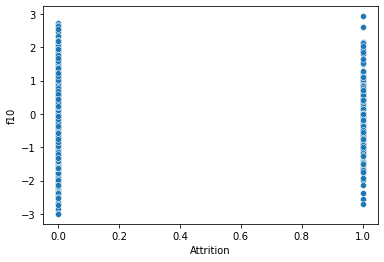

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


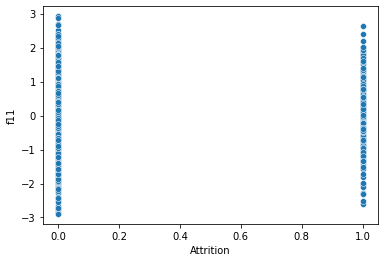

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


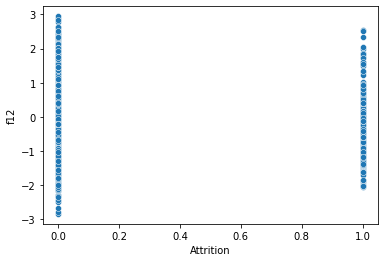

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


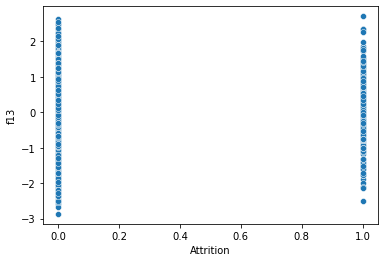

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


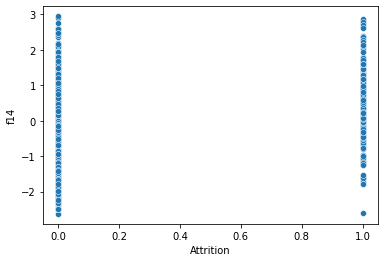

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


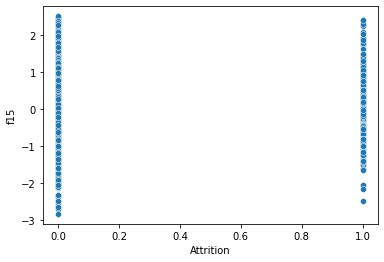

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


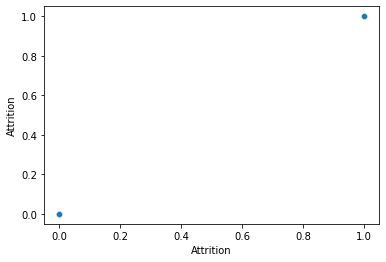

In [181]:
for i in df_pca.columns:
    sns.scatterplot(df_pca["Attrition"],df_pca[i])
    plt.show()

Since our target values are binary classification our data is divided into 2 categories for all the values

# Data Preprocessing

In [195]:
X = df_pca.drop("Attrition",axis=1)
X

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15
0,0.578932,-1.302636,2.953540,0.760069,-0.002675,1.188569,0.727609,0.715534,-0.327336,1.062907,2.259289,-1.370648,-0.042556,-0.394917,-0.833058
1,-2.464295,1.229962,-0.328856,1.069798,-1.285649,1.399982,0.095083,-2.318839,0.246408,-0.080716,-1.135783,-0.436340,0.875940,1.782791,-0.469405
2,-0.859866,-0.496316,-1.219892,-0.056798,-0.404831,2.121839,-0.695105,-0.363361,0.733815,-0.081282,0.359824,0.832363,-2.321922,-0.932351,-0.833062
3,-1.835541,1.256591,-0.559590,-0.313232,-1.024604,0.612226,0.478556,-1.446268,-1.166915,0.763329,1.384837,-1.244307,-0.282594,0.181267,0.078390
4,-0.621815,-1.178910,-0.413624,-0.477306,-2.407051,1.465896,-1.481992,-0.275342,-1.228576,-0.159549,-0.105923,-0.060140,0.024155,-0.480876,-1.680076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,0.065678,-1.206648,0.381167,0.219628,-1.444215,-2.085382,-0.013074,0.924756,-0.354977,1.669741,-0.714699,-0.213402,0.929597,1.057312,-1.008783
1406,-2.456401,-1.895037,-1.010546,1.551372,0.543444,0.783933,1.553861,-0.069666,0.980067,0.442602,-0.903296,1.112539,-0.293522,-0.160425,-0.225643
1407,-0.720195,0.993885,0.572516,-0.605777,-0.498901,0.136037,0.002410,0.562706,-0.310293,1.152835,-0.675121,1.755214,1.385646,-1.390038,0.968824
1408,0.896706,-0.715545,-1.133251,0.406664,0.634841,-0.158660,0.334381,0.119342,-0.000192,1.230396,-0.731769,0.935787,0.636909,0.746020,-1.584482


In [198]:
y = df_pca["Attrition"]
y

0       0
1       1
2       0
3       0
4       0
       ..
1405    0
1406    0
1407    0
1408    0
1409    0
Name: Attrition, Length: 1410, dtype: int64

In [199]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Model Learning

### K-Nearest Neighbor Classifier

In [200]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [203]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [211]:
f1_score(y_test, y_pred, average='weighted')

0.8103905411953515

We use a weighted f1_score to solve the class imbalance problem

In [221]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[239,   3],
       [ 37,   3]])

In [224]:
actual_accuracy = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[0][1]+cf[1][0]+cf[1][1])
actual_accuracy

0.8581560283687943

In [225]:
knn.score(X_train, y_train)

0.8714539007092199

In [227]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
clf = KNeighborsClassifier()
scores = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
scores

array([0.84468085, 0.83404255, 0.84255319])

In [228]:
print(np.mean(scores),np.std(scores))

0.8404255319148937 0.004596269998870847


### Decision Trees.

In [237]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)


DecisionTreeClassifier()

In [239]:
y_pred = DTC.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [240]:
f1_score(y_test, y_pred, average='weighted')

0.7820004650907579

In [241]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[208,  34],
       [ 29,  11]])

In [242]:
actual_accuracy = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[0][1]+cf[1][0]+cf[1][1])
actual_accuracy

0.776595744680851

In [243]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
clf = KNeighborsClassifier()
scores = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
scores

array([0.84468085, 0.83404255, 0.84255319])

In [245]:
print(np.mean(scores),np.std(scores))

0.8404255319148937 0.004596269998870847


### Gaussian Naive Bayes Classifier

In [246]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [247]:
y_pred = nb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [248]:
f1_score(y_test, y_pred, average='weighted')

0.8150381035188216

In [249]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[235,   7],
       [ 35,   5]])

In [250]:
actual_accuracy = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[0][1]+cf[1][0]+cf[1][1])
actual_accuracy

0.851063829787234

In [251]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
clf = KNeighborsClassifier()
scores = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
scores

array([0.84468085, 0.83404255, 0.84255319])

In [252]:
print(np.mean(scores),np.std(scores))

0.8404255319148937 0.004596269998870847


### Random Forest Classifier.

In [253]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [255]:
y_pred=rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [256]:
f1_score(y_test, y_pred, average='weighted')

0.8029717086413679

In [257]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[239,   3],
       [ 38,   2]])

In [258]:
actual_accuracy = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[0][1]+cf[1][0]+cf[1][1])
actual_accuracy

0.8546099290780141

In [259]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
clf = KNeighborsClassifier()
scores = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
scores

array([0.84468085, 0.83404255, 0.84255319])

In [260]:
print(np.mean(scores),np.std(scores))

0.8404255319148937 0.004596269998870847


From the observations made from above algorithm we see that Gaussian Naive Bayes Theorem has the best f1 score.

# Using hyperparameters on Gaussian Naive Bayes Classifier to improve accuracy

In [262]:
nb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [264]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [265]:
nb_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nb_grid.fit(X_train, y_train)
print(nb_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 770 tasks      | elapsed:    1.8s


GaussianNB(var_smoothing=0.0015199110829529332)


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.0s finished


In [267]:
nb = GaussianNB(var_smoothing=0.0015199110829529332)
nb.fit(X_train,y_train)

GaussianNB(var_smoothing=0.0015199110829529332)

In [268]:
y_pred = nb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [269]:
f1_score(y_test, y_pred, average='weighted')

0.8150381035188216

After applying hyperparameters we observe that there is not much increase in the f1_score therefore we have the best parameters as per our observations